# Superpose an observation point on a H2D plot

In [1]:
%matplotlib inline
# for figures in notebook

# import & initialize epygram
import epygram
epygram.init_env()

import os
INPUTS_DIR = os.path.join(epygram.config.installdir, 'doc_sphinx', 'source', 'gallery', 'inputs')

In [2]:
r = epygram.formats.resource(os.path.join(INPUTS_DIR, 'grid.arome-forecast.guyane0025+0024:00.grib'), 'r')

In [3]:
f = r.readfield('shortName:2r')

In [4]:
import cartopy.crs as ccrs
lonlat_crs = ccrs.PlateCarree()
station = (-52.6, 5.1)
value = 60.

Text(-119668,564685,' Kourou')

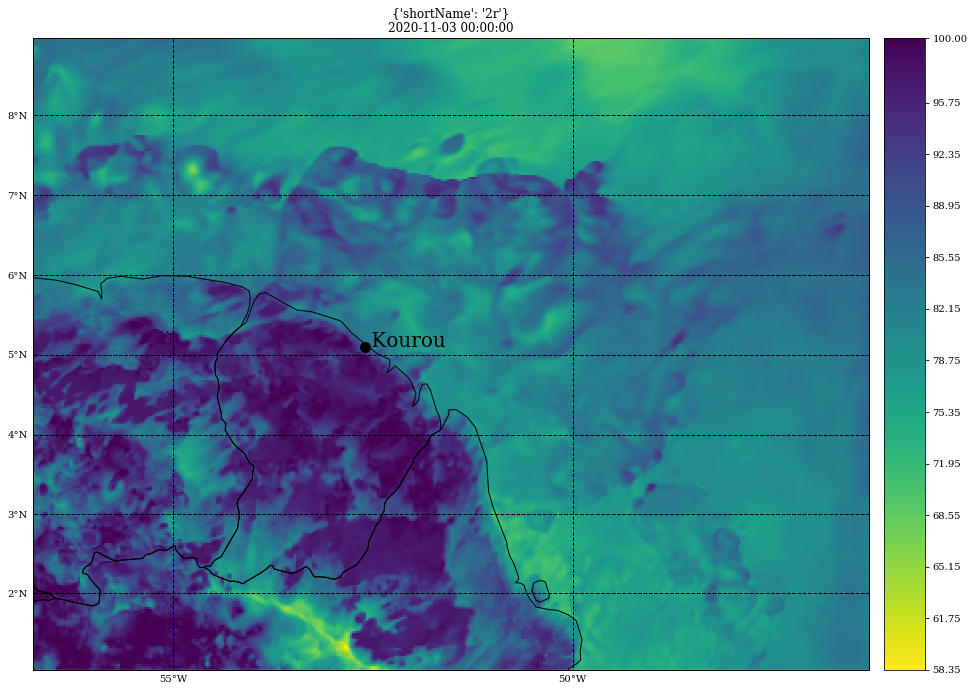

In [5]:
fig, ax = f.cartoplot(colormap='viridis_r')
x, y = ax.projection.transform_point(*station, lonlat_crs)
ax.scatter(x, y, s=100, c='k')
ax.text(x, y, ' Kourou', size=20)

## Now if we want the color of the obs point to match the colormap of the field:

In [6]:
# for that we need arrays
import numpy as np
lons = np.array([station[0]])
lats = np.array([station[1]])
values = np.array([value])

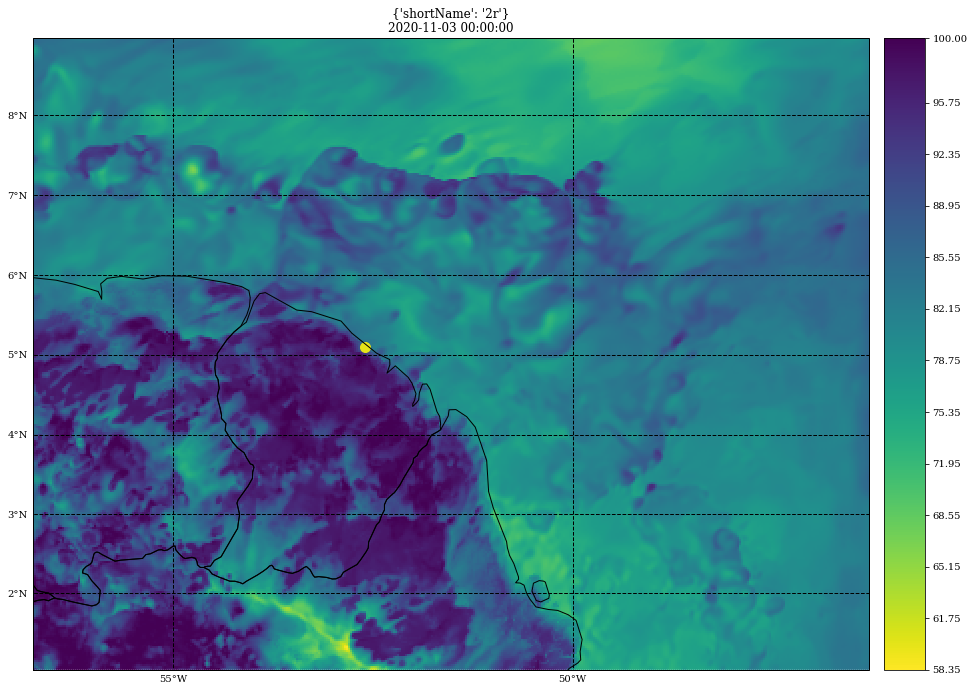

In [7]:
fig, ax = f.cartoplot(colormap='viridis_r')
xyz = ax.projection.transform_points(lonlat_crs, lons, lats)
x = xyz[..., 0]
y = xyz[..., 1]
ax.scatter(x, y, s=100, c=values, cmap='viridis_r',
           vmin=f.data.min(), vmax=f.data.max())

## And now if the colormap is complex and needs a ColormapHelper to handle:

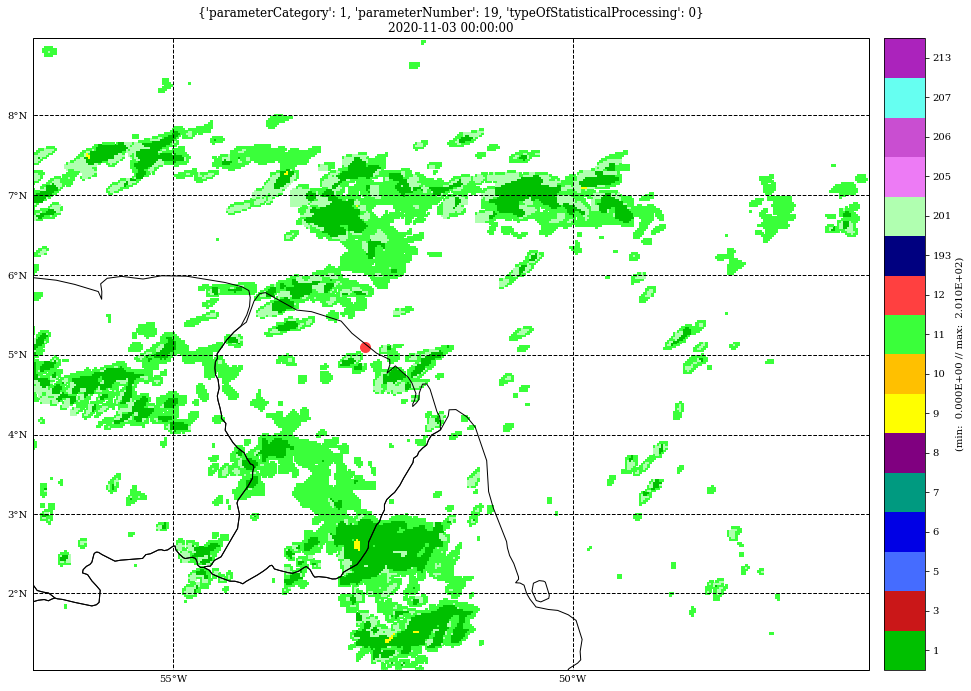

In [8]:
f = r.readfield('parameterCategory:1,parameterNumber:19,typeOfStatisticalProcessing:0')
values = np.array([12])  # the red color in colormap
fig, ax = f.cartoplot(colormap='ptype')
ch = epygram.colormapping.get_ColormapHelper('ptype')
ax.scatter(x, y, s=100, c=values, **ch.kwargs_for_plot('scatter'))